In [ ]:
from torchinfo import summary
from models.DC_CDN import DC_CDN_Classifier
import torch

device = 'cuda:0'
model = DC_CDN_Classifier(device=device).to(device)
summary(model, input_size=(1, 3, 256, 256))


In [9]:
import pandas as pd 

In [16]:
df_train = pd.read_csv("/data02/manhquang/dataset/celeba-spoof/CelebA_Spoof_/CelebA_Spoof/metas/intra_test/train_label.txt", sep=" ", header=None)
df_train.head()

,0,1
0,Data/train/2623/live/000000.jpg,0
1,Data/train/5489/spoof/000001.jpg,1
2,Data/train/7149/spoof/000002.jpg,1
3,Data/train/4980/spoof/000003.jpg,1
4,Data/train/7124/spoof/000004.jpg,1


In [17]:
df_train[1].value_counts()

1
1    331943
0    162462
Name: count, dtype: int64

In [18]:
df_test = pd.read_csv("/data02/manhquang/dataset/celeba-spoof/CelebA_Spoof_/CelebA_Spoof/metas/intra_test/test_label.txt", sep=" ", header=None)
df_test.head()

,0,1
0,Data/test/6964/spoof/494405.png,1
1,Data/test/9596/spoof/494406.png,1
2,Data/test/9014/spoof/494407.png,1
3,Data/test/7607/spoof/494408.png,1
4,Data/test/5624/spoof/494409.png,1


In [19]:
df_test[1].value_counts()

1
1    47247
0    19923
Name: count, dtype: int64

In [23]:
import re

def find_substrings(text, place_keywords):
    found = []
    text_lower = text.lower()
    for place in sorted(place_keywords, key=lambda x: -len(x)):  # Ưu tiên từ dài
        norm_place = place.replace(" ", "").lower()
        match = re.search(re.escape(norm_place), text_lower)
        if match:
            found.append((match.start(), match.end(), place))
            
    # Loại bỏ trùng lặp chồng lấn
    found = sorted(found, key=lambda x: x[0])
    cleaned = []
    last_end = -1
    for start, end, place in found:
        if start >= last_end:
            cleaned.append(place)
            last_end = end
    return cleaned

wards = ["Thảo Điền", "Bến Nghé", "Phạm Ngũ Lão"]
districts = ["Quận 1", "Quận 2", "Thủ Đức"]
cities = ["TP Hồ Chí Minh", "Hà Nội", "Đà Nẵng"]
abbr = ["TP HCM", "HCM", "HN", "TPHCM"]
streets = ["Nguyễn Văn Hưởng", "Trần Hưng Đạo"]

place_keywords = set(wards + districts + cities + abbr + streets)

input_str = "17.01 Lô A c/c 170 NguyễnVănHưởng,ThảoĐiềnTPThủĐứcHCM"
input_str = re.sub(r'\s+', '', input_str)
matches = find_substrings(input_str, place_keywords)

print(matches)

# Thêm dấu phẩy ngăn cách giữa các thực thể
print("======= Find =======")
for m in matches:
    print(m)
    # input_str = input_str.replace(m, m + ",")
    # print(input_str)


['Nguyễn Văn Hưởng', 'Thảo Điền', 'Thủ Đức', 'HCM']
17.01LôAc/c170NguyễnVănHưởng,ThảoĐiềnTPThủĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,ThảoĐiềnTPThủĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,ThảoĐiềnTPThủĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,Thảo ĐiềnTPThủĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,Thảo ĐiềnTPThủĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,Thảo ĐiềnTPThủ ĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,Thảo ĐiềnTPThủ ĐứcHCM
17.01LôAc/c170Nguyễn Văn Hưởng,Thảo ĐiềnTPThủ ĐứcHCM
======= Find =======
Nguyễn Văn Hưởng
Thảo Điền
Thủ Đức
HCM


In [25]:
import re

def find_substrings(text, place_keywords):
    found = []
    text_lower = text.lower()
    for place in sorted(place_keywords, key=lambda x: -len(x)):  # Ưu tiên từ dài
        norm_place = place.replace(" ", "").lower()
        match = re.search(re.escape(norm_place), text_lower)
        if match:
            found.append((match.start(), match.end(), place))
            
    # Loại bỏ trùng lặp chồng lấn
    found = sorted(found, key=lambda x: x[0])
    cleaned = []
    last_end = -1
    for start, end, place in found:
        if start >= last_end:
            cleaned.append((start, end, place))
            last_end = end
    return cleaned

# Danh sách từ khóa
wards = ["Thảo Điền", "Bến Nghé", "Phạm Ngũ Lão"]
districts = ["Quận 1", "Quận 2", "Thủ Đức"]
cities = ["TP Hồ Chí Minh", "Hà Nội", "Đà Nẵng"]
abbr = ["TP HCM", "HCM", "HN", "TPHCM"]
streets = ["Nguyễn Văn Hưởng", "Trần Hưng Đạo"]

place_keywords = set(wards + districts + cities + abbr + streets)

# Chuỗi đầu vào
input_str = "17.01 Lô A c/c 170 NguyễnVănHưởng,ThảoĐiềnTPThủĐứcHCM"
input_str = re.sub(r'\s+', '', input_str)  # Xóa khoảng trắng

matches = find_substrings(input_str, place_keywords)

# In kết quả
print("======= Find =======")
for i, (start, end, place) in enumerate(matches):
    print(f"{i}: '{place}' xuất hiện từ index {start} đến {end}")


======= Find =======
0: 'Nguyễn Văn Hưởng' xuất hiện từ index 14 đến 28
1: 'Thảo Điền' xuất hiện từ index 29 đến 37
2: 'Thủ Đức' xuất hiện từ index 39 đến 45
3: 'HCM' xuất hiện từ index 45 đến 48


In [1]:
import re

def find_substrings(text, place_keywords):
    found = []
    text_lower = text.lower()
    for place in sorted(place_keywords, key=lambda x: -len(x)):  # Ưu tiên từ dài
        norm_place = place.replace(" ", "").lower()
        match = re.search(re.escape(norm_place), text_lower)
        if match:
            found.append((match.start(), match.end(), place))

    # Loại bỏ trùng lặp chồng lấn
    found = sorted(found, key=lambda x: x[0])
    cleaned = []
    last_end = -1
    for start, end, place in found:
        if start >= last_end:
            cleaned.append((start, end, place))  # Giữ nguyên vị trí thật
            last_end = end
    return cleaned

# Danh sách thực thể
wards = ["Thảo Điền", "Bến Nghé", "Phạm Ngũ Lão"]
districts = ["Quận 1", "Quận 2", "Thủ Đức"]
cities = ["TP Hồ Chí Minh", "Hà Nội", "Đà Nẵng"]
abbr = ["TP HCM", "HCM", "HN", "TPHCM"]
streets = ["Nguyễn Văn Hưởng", "Trần Hưng Đạo"]

place_keywords = set(wards + districts + cities + abbr + streets)

# Xử lý chuỗi đầu vào
input_str = "17.01 Lô A c/c 170 NguyễnVănHưởng,ThảoĐiềnTPThủĐứcHCM"
input_str = re.sub(r'\s+', '', input_str)  # => bỏ khoảng trắng

# Tìm các thực thể
matches = find_substrings(input_str, place_keywords)

# In kết quả đúng vị trí
print("======= Find =======")
for i, (start, end, place) in enumerate(matches):
    print(f"{i}: '{place}' xuất hiện từ index {start} đến {end}")


======= Find =======
0: 'Nguyễn Văn Hưởng' xuất hiện từ index 14 đến 28
1: 'Thảo Điền' xuất hiện từ index 29 đến 37
2: 'Thủ Đức' xuất hiện từ index 39 đến 45
3: 'HCM' xuất hiện từ index 45 đến 48


In [13]:
def compute_acer(confusion_matrix):
    """
    confusion_matrix: list or array of shape (2,2)
    [[TN, FP],
     [FN, TP]]
    """
    TN, FP = confusion_matrix[0]
    FN, TP = confusion_matrix[1]

    # Tránh chia cho 0
    apcer = FN / (FN + TP) if (FN + TP) != 0 else 0
    bpcer = FP / (FP + TN) if (FP + TN) != 0 else 0
    acer = (apcer + bpcer) / 2

    return apcer, bpcer, acer

# Ví dụ:
cm = [[10066, 11],  # Real: 70 đúng, 10 sai → TN, FP
      [1443, 150]]   # Fake: 5 sai, 15 đúng → FN, TP

apcer, bpcer, acer = compute_acer(cm)

print(f"APCER: {apcer*100:.4f}%")
print(f"BPCER: {bpcer*100:.4f}%")
print(f"ACER : {acer*100:.4f}%")


APCER: 90.5838%
BPCER: 0.1092%
ACER : 45.3465%


In [1]:
import torch
from torchvision import transforms
from PIL import Image
from models.DC_CDN import DC_CDN_Classifier  # đảm bảo path đúng
from preprocess import transformsv2 as Tv2

# --- Cấu hình ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_path = "/work/quang.domanh/face-anti-spoofing/runs/dc_cdn_2cls/train_11/weights/best_dc_cdn_classifier.pt"  # hoặc .pth nếu bạn dùng đuôi này

# --- Load model ---
model = DC_CDN_Classifier(device=device).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# --- Transform ảnh ---
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor()
# ])

DC_CDN_Classifier(
  (feature_extractor): FeatureExtractor(
    (nets): DC_CDN(
      (conv1): Sequential(
        (0): Conv2d_Hori_Veri_Cross(
          (conv): Conv2d(3, 64, kernel_size=(1, 5), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (Block1): Sequential(
        (0): Conv2d_Hori_Veri_Cross(
          (conv): Conv2d(64, 128, kernel_size=(1, 5), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d_Hori_Veri_Cross(
          (conv): Conv2d(128, 196, kernel_size=(1, 5), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (4): BatchNorm2d(196, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): Conv2d_Hori_Veri_Cross(
          (conv): Conv2d(196, 128, kernel_size=(

3.9243425931090314e-07
📷 Image: /work/quang.domanh/face-anti-spoofing/images/test/query-impala-89667.csv_3d535112-c606-42c2-9ded-99807e3d08d2.jpg
🔍 Probability: 0.0000
✅ Prediction: Live


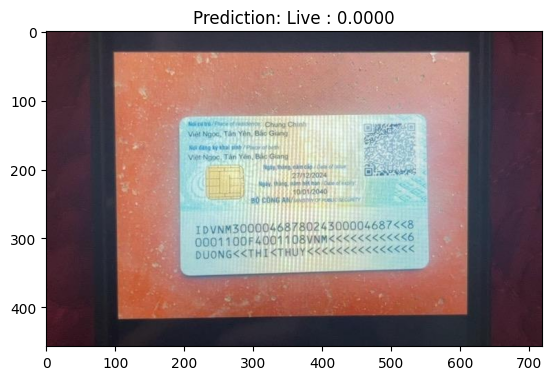

In [9]:
import cv2
import matplotlib.pyplot as plt

test_transform = Tv2.Compose([
        Tv2.Resize((256, 256)),
        # Tv2.CenterCrop(args.input_size),
        Tv2.ColorTrans(mode=0), # BGR to RGB
        Tv2.ToTensor(),
        Tv2.Normalize(
            mean=[0.485, 0.456, 0.406],    # chuẩn hóa (ImageNet mean/std)
            std=[0.229, 0.224, 0.225]
        ),
    ])

# --- Load ảnh ---
img_path = "/work/quang.domanh/face-anti-spoofing/images/test/query-impala-89667.csv_3d535112-c606-42c2-9ded-99807e3d08d2.jpg"  # 🔁 thay bằng ảnh bạn muốn dự đoán
# img = Image.open(img_path).convert('RGB')
img = cv2.imread(img_path)
input_tensor = test_transform(img).unsqueeze(0).to(device)  # shape: [1, 3, 256, 256]

# --- Dự đoán ---
with torch.no_grad():
    output = model(input_tensor)
    print(output.item())
    prob = output.item()
    pred = 1 if prob > 0.5 else 0
    class_name = "Spoof" if pred == 1 else "Live"
    print(f"📷 Image: {img_path}")
    print(f"🔍 Probability: {prob:.4f}")
    print("✅ Prediction:", class_name)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {class_name} : {prob:.4f}")
    plt.show()

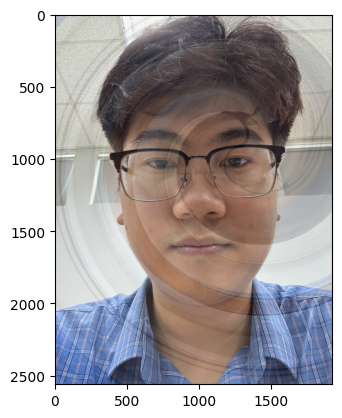

In [7]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

class Moire:

    def __init__(self):
        pass

    def add_moire_noise(self, src):
        height, width = src.shape[:2]
        center = (height // 2, width // 2)
        degree = random.uniform(0.0005, 0.01)

        # Tạo tọa độ lưới
        x = np.arange(width)
        y = np.arange(height)
        X, Y = np.meshgrid(x, y)

        # Tính toán độ lệch từ tâm
        offset_X = X - center[0]
        offset_Y = Y - center[1]

        # Tính góc và bán kính trong tọa độ cực
        theta = np.arctan2(offset_Y, offset_X)
        rou = np.sqrt(offset_X ** 2 + offset_Y ** 2)

        # Tính toán tọa độ mới
        new_X = center[0] + rou * np.cos(theta + degree * rou)
        new_Y = center[1] + rou * np.sin(theta + degree * rou)

        # Phạm vi tọa độ giới hạn
        new_X = np.clip(new_X, 0, width - 1).astype(np.int32)
        new_Y = np.clip(new_Y, 0, height - 1).astype(np.int32)

        # Áp dụng hiệu ứng moiré
        dst = 0.8 * src + 0.2 * src[new_Y, new_X]

        return dst.astype(np.uint8)

    def __call__(self, img):
        img = self.add_moire_noise(img)
        return img


img = cv2.imread('/data02/manhquang/face-anti-spoofing/images/z6852353978464_2518dc77b7a9722136dfd7ca4f022f05.jpg')
moire = Moire()
img = moire(img)
# cv2.imwrite('/data02/manhquang/face-anti-spoofing/images/transforms_moire.png', img)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
'''
Code of 'Dual-Cross Central Difference Network for Face Anti-Spoofing' 
By Zitong Yu, 2021

If you use the code, please cite:
@inproceedings{yu2021dual,
    title={Dual-Cross Central Difference Network for Face Anti-Spoofing},
    author={Yu, Zitong and Qin, Yunxiao and ZHoa, Hengshuang and Li, Xiaobai and Zhao, Guoying},
    booktitle= {IJCAI},
    year = {2021}
}

Only for research purpose, and commercial use is not allowed.

MIT License
Copyright (c) 2021 
'''

import math

import torch
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from torch import nn
from torch.nn import Parameter
import pdb
import numpy as np




class Conv2d_Hori_Veri_Cross(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1,
                 padding=1, dilation=1, groups=1, bias=False, theta=0.7):

        super(Conv2d_Hori_Veri_Cross, self).__init__() 
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 5), stride=stride, padding=padding, dilation=dilation, groups=groups, bias=bias)
        self.theta = theta

    def forward(self, x):
        
        
        [C_out,C_in,H_k,W_k] = self.conv.weight.shape
        tensor_zeros = torch.FloatTensor(C_out, C_in, 1).fill_(0).cuda()
        conv_weight = torch.cat((tensor_zeros, self.conv.weight[:,:,:,0], tensor_zeros, self.conv.weight[:,:,:,1], self.conv.weight[:,:,:,2], self.conv.weight[:,:,:,3], tensor_zeros, self.conv.weight[:,:,:,4], tensor_zeros), 2)
        conv_weight = conv_weight.contiguous().view(C_out, C_in, 3, 3)
        
        out_normal = F.conv2d(input=x, weight=conv_weight, bias=self.conv.bias, stride=self.conv.stride, padding=self.conv.padding)

        if math.fabs(self.theta - 0.0) < 1e-8:
            return out_normal 
        else:
            #pdb.set_trace()
            [C_out,C_in, kernel_size,kernel_size] = self.conv.weight.shape
            kernel_diff = self.conv.weight.sum(2).sum(2)
            kernel_diff = kernel_diff[:, :, None, None]
            out_diff = F.conv2d(input=x, weight=kernel_diff, bias=self.conv.bias, stride=self.conv.stride, padding=0, groups=self.conv.groups)

            return out_normal - self.theta * out_diff



class Conv2d_Diag_Cross(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1,
                 padding=1, dilation=1, groups=1, bias=False, theta=0.7):

        super(Conv2d_Diag_Cross, self).__init__() 
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=(1, 5), stride=stride, padding=padding, dilation=dilation, groups=groups, bias=bias)
        self.theta = theta

    def forward(self, x):
        
        
        [C_out,C_in,H_k,W_k] = self.conv.weight.shape
        tensor_zeros = torch.FloatTensor(C_out, C_in, 1).fill_(0).cuda()
        conv_weight = torch.cat((self.conv.weight[:,:,:,0], tensor_zeros, self.conv.weight[:,:,:,1], tensor_zeros, self.conv.weight[:,:,:,2], tensor_zeros, self.conv.weight[:,:,:,3], tensor_zeros, self.conv.weight[:,:,:,4]), 2)
        conv_weight = conv_weight.contiguous().view(C_out, C_in, 3, 3)
        
        out_normal = F.conv2d(input=x, weight=conv_weight, bias=self.conv.bias, stride=self.conv.stride, padding=self.conv.padding)

        if math.fabs(self.theta - 0.0) < 1e-8:
            return out_normal 
        else:
            #pdb.set_trace()
            [C_out,C_in, kernel_size,kernel_size] = self.conv.weight.shape
            kernel_diff = self.conv.weight.sum(2).sum(2)
            kernel_diff = kernel_diff[:, :, None, None]
            out_diff = F.conv2d(input=x, weight=kernel_diff, bias=self.conv.bias, stride=self.conv.stride, padding=0, groups=self.conv.groups)

            return out_normal - self.theta * out_diff




class C_CDN(nn.Module):
    
    def __init__(self, basic_conv=Conv2d_Hori_Veri_Cross, theta=0.8):   
        super(C_CDN, self).__init__()
        
        
        self.conv1 = nn.Sequential(
            basic_conv(3, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        self.Block1 = nn.Sequential(
            basic_conv(64, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            
        )
        
        self.Block2 = nn.Sequential(
            basic_conv(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),  
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.Block3 = nn.Sequential(
            basic_conv(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.lastconv1 = nn.Sequential(
            basic_conv(128*3, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),    
        )
        
        self.lastconv2 = nn.Sequential(
            basic_conv(128, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        self.lastconv3 = nn.Sequential(
            basic_conv(64, 1, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            #nn.Conv2d(64, 1, kernel_size=1, stride=1, padding=0, bias=False),
            nn.ReLU(),    
        )
        
        
        self.downsample32x32 = nn.Upsample(size=(32, 32), mode='bilinear')

 
    def forward(self, x):	    	# x [3, 256, 256]
        
        x_input = x
        x = self.conv1(x)		   
        
        x_Block1 = self.Block1(x)	    	    	# x [128, 128, 128]
        x_Block1_32x32 = self.downsample32x32(x_Block1)   # x [128, 32, 32]  
        
        x_Block2 = self.Block2(x_Block1)	    # x [128, 64, 64]	  
        x_Block2_32x32 = self.downsample32x32(x_Block2)   # x [128, 32, 32]  
        
        x_Block3 = self.Block3(x_Block2)	    # x [128, 32, 32]  	
        x_Block3_32x32 = self.downsample32x32(x_Block3)   # x [128, 32, 32]  
        
        x_concat = torch.cat((x_Block1_32x32,x_Block2_32x32,x_Block3_32x32), dim=1)    # x [128*3, 32, 32]  
        
        #pdb.set_trace()
        
        x = self.lastconv1(x_concat)    # x [128, 32, 32] 
        x = self.lastconv2(x)    # x [64, 32, 32] 
        x = self.lastconv3(x)    # x [1, 32, 32] 
        
        depth = x.squeeze(1)
        
        return depth





class DC_CDN(nn.Module):

    def __init__(self, basic_conv1=Conv2d_Hori_Veri_Cross, basic_conv2=Conv2d_Diag_Cross, theta=0.8):   
        super(DC_CDN, self).__init__()
        
        
        self.conv1 = nn.Sequential(
            basic_conv1(3, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        self.Block1 = nn.Sequential(
            basic_conv1(64, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv1(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv1(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            
        )
        
        self.Block2 = nn.Sequential(
            basic_conv1(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv1(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv1(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),  
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.Block3 = nn.Sequential(
            basic_conv1(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv1(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv1(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.lastconv1 = nn.Sequential(
            basic_conv1(128*3, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),    
        )
        
        self.lastconv2 = nn.Sequential(
            basic_conv1(128, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        self.lastconv3 = nn.Sequential(
            #basic_conv1(64, 1, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.Conv2d(128, 1, kernel_size=1, stride=1, padding=0, bias=False),
            nn.ReLU(),    
        )
        
        
        
        # 2nd stream
        self.conv1_2 = nn.Sequential(
            basic_conv2(3, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        self.Block1_2 = nn.Sequential(
            basic_conv2(64, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv2(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv2(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
            
        )
        
        self.Block2_2 = nn.Sequential(
            basic_conv2(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv2(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv2(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),  
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.Block3_2 = nn.Sequential(
            basic_conv2(128, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            basic_conv2(128, 196, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(196),
            nn.ReLU(),  
            basic_conv2(196, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),   
            nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        )
        
        self.lastconv1_2 = nn.Sequential(
            basic_conv2(128*3, 128, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(128),
            nn.ReLU(),    
        )
        
        self.lastconv2_2 = nn.Sequential(
            basic_conv2(128, 64, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
            nn.BatchNorm2d(64),
            nn.ReLU(),    
        )
        
        #self.lastconv3_2 = nn.Sequential(
        #    basic_conv2(64, 1, kernel_size=3, stride=1, padding=1, bias=False, theta= theta),
        #    #nn.Conv2d(64, 1, kernel_size=1, stride=1, padding=0, bias=False),
        #    nn.ReLU(),    
        #)
        
        #self.HP_branch1 = Parameter(torch.ones([3,1]))
        self.HP_branch1 = Parameter(torch.zeros([3,1]))
        #self.HP_branch2 = Parameter(torch.ones([3,1]))
        self.HP_branch2 = Parameter(torch.zeros([3,1]))
        
        
        
        self.downsample32x32 = nn.Upsample(size=(32, 32), mode='bilinear')

 
    def forward(self, x):	    	# x [3, 256, 256]
        
        x_input = x
        
        # 1st stream
        x = self.conv1(x_input)	
        x_2 = self.conv1_2(x_input)	   
        
        x_Block1 = self.Block1(x)	    	    	# x [128, 128, 128]
        x_Block1_2 = self.Block1_2(x_2)	    	    	# x [128, 128, 128]
        
        # fusion1
        x_Block1_new = F.sigmoid(self.HP_branch1[0])*x_Block1 + (1-F.sigmoid(self.HP_branch1[0]))*x_Block1_2
        x_Block1_2_new = F.sigmoid(self.HP_branch2[0])*x_Block1_2 + (1-F.sigmoid(self.HP_branch2[0]))*x_Block1
        
        
        x_Block2 = self.Block2(x_Block1)	    # x [128, 64, 64]	  
        x_Block2_2 = self.Block2_2(x_Block1_2)	    # x [128, 64, 64]	  
        
        # fusion2
        x_Block2_new = F.sigmoid(self.HP_branch1[1])*x_Block2 + (1-F.sigmoid(self.HP_branch1[1]))*x_Block2_2
        x_Block2_2_new = F.sigmoid(self.HP_branch2[1])*x_Block2_2 + (1-F.sigmoid(self.HP_branch2[1]))*x_Block2
        
        
        x_Block3 = self.Block3(x_Block2)	    # x [128, 32, 32]  	
        x_Block3_2 = self.Block3_2(x_Block2_2)	    # x [128, 32, 32]  	
        
        # fusion3
        x_Block3_new = F.sigmoid(self.HP_branch1[2])*x_Block3 + (1-F.sigmoid(self.HP_branch1[2]))*x_Block3_2
        x_Block3_2_new = F.sigmoid(self.HP_branch2[2])*x_Block3_2 + (1-F.sigmoid(self.HP_branch2[2]))*x_Block3
         
        
        x_Block1_32x32 = self.downsample32x32(x_Block1_new)   # x [128, 32, 32]  
        x_Block2_32x32 = self.downsample32x32(x_Block2_new)   # x [128, 32, 32]  
        x_Block3_32x32 = self.downsample32x32(x_Block3_new)   # x [128, 32, 32] 
        
        x_concat = torch.cat((x_Block1_32x32,x_Block2_32x32,x_Block3_32x32), dim=1)    # x [128*3, 32, 32]  
        
        x = self.lastconv1(x_concat)    # x [128, 32, 32] 
        depth1 = self.lastconv2(x)    # x [64, 32, 32] 
        #x = self.lastconv3(x)    # x [1, 32, 32] 
        
        #map_x_1 = x.squeeze(1)
        
        
        # 2nd stream
        x_Block1_32x32 = self.downsample32x32(x_Block1_2_new)   # x [128, 32, 32]  
        x_Block2_32x32 = self.downsample32x32(x_Block2_2_new)   # x [128, 32, 32]  
        x_Block3_32x32 = self.downsample32x32(x_Block3_2_new)   # x [128, 32, 32]  
        
        x_concat = torch.cat((x_Block1_32x32,x_Block2_32x32,x_Block3_32x32), dim=1)    # x [128*3, 32, 32]  
        
        x = self.lastconv1_2(x_concat)    # x [128, 32, 32] 
        depth2 = self.lastconv2_2(x)    # x [64, 32, 32] 
        
        
        # fusion
        depth = torch.cat((depth1,depth2), dim=1)
        depth = self.lastconv3(depth)    # x [1, 32, 32] 
        
        depth = depth.squeeze(1)
        
        
        return depth

In [ ]:
inputs = torch.randn(1,3,256,256).cuda()

model_C_CDN = C_CDN(basic_conv=Conv2d_Hori_Veri_Cross, theta=0.8).cuda()
depth =  model_C_CDN(inputs)
print(depth)
model_C_CDN = C_CDN(basic_conv=Conv2d_Diag_Cross, theta=0.8).cuda()
depth =  model_C_CDN(inputs)
print(depth)
model_DC_CDN = DC_CDN(basic_conv1=Conv2d_Hori_Veri_Cross, basic_conv2=Conv2d_Diag_Cross, theta=0.8).cuda()
depth =  model_DC_CDN(inputs)
print(depth)
# pdb.set_trace()